<a href="https://colab.research.google.com/github/aansheeagrwal/Deep-Learning/blob/main/handling_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
184,1918-ZBFQJ,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes
708,3014-WJKSM,Male,0,Yes,No,29,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,2263.4,No
3789,0310-VQXAM,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,178.8,No
2315,2577-GVSIL,Male,0,Yes,Yes,35,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),73.45,2661.1,No
5890,0383-CLDDA,Female,0,No,No,69,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.35,5897.4,No


In [4]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [16]:
517400/df.shape[0]

73.46301292063042

In [17]:
df.drop('customerID',axis='columns',inplace=True)

In [18]:
df.dtypes


,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [19]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [21]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [22]:
df.shape

(7043, 20)

In [23]:
df.iloc[488].TotalCharges

' '

In [24]:
df[df.TotalCharges!=' '].shape


(7032, 20)

In [25]:
df1 = df[df.TotalCharges!=' ']
df1.shape


(7032, 20)

In [26]:
df1.dtypes


,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [27]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [28]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [29]:
df1[df1.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


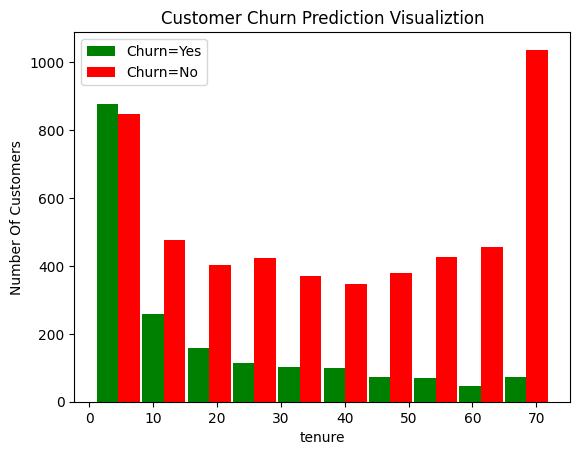

In [30]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

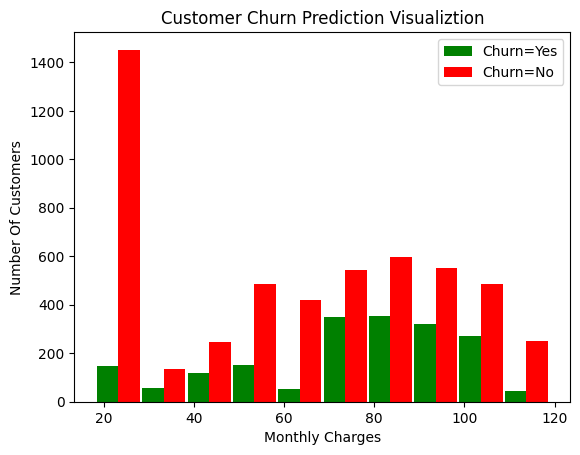

In [31]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [32]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [33]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [35]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [36]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [37]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [38]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [39]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [40]:
df1.gender.unique()


array([1, 0])

In [41]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [42]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3871,0,0,0,0,3,1,1,0,0,1,...,False,True,False,True,False,False,True,False,False,False
4823,0,0,0,0,1,1,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
3803,0,0,1,0,61,1,1,0,1,0,...,False,True,False,False,False,True,False,False,True,False
3907,0,0,0,0,19,1,0,0,0,1,...,False,True,False,True,False,False,False,False,False,True
468,1,0,0,1,44,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True


In [43]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [44]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [45]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')


gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [46]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [48]:
y_train.value_counts()

,count
Churn,
0.0,4130
1.0,1495


In [49]:
y.value_counts()


,count
Churn,
0.0,5163
1.0,1869


In [50]:
5163/1869


2.7624398073836276

In [51]:
y_test.value_counts()


,count
Churn,
0.0,1033
1.0,374


In [52]:
X_train.shape


(5625, 26)

In [53]:
X_test.shape


(1407, 26)

In [54]:
X_train[:10]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2446,1,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2220,0,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2842,1,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5131,1,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4372,0,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4687,0,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2385,1,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6773,0,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [55]:
len(X_train.columns)


26

In [56]:
!pip install tensorflow==2.13

In [57]:
!pip install tensorflow_addons

In [5]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.13.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.13.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.13.0 which is incompatibl

In [7]:
!pip uninstall tensorflow tensorflow-addons -y

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0
Found existing installation: tensorflow-addons 0.20.0
Uninstalling tensorflow-addons-0.20.0:
  Successfully uninstalled tensorflow-addons-0.20.0


In [1]:
!pip install tensorflow==2.13


In [2]:
!pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [58]:
!pip uninstall jax jaxlib -y

In [59]:
!pip install tensorflow_addons

In [60]:
from tensorflow_addons import losses

In [61]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [62]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [63]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [66]:
# Ensure this cell is executed before calling the ANN function
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

# Convert X to float32 type
X = X.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Then, execute the cell that calls the ANN function
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 35.5650 - accuracy: 0.6740
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 1.2508 - accuracy: 0.7029
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.9758 - accuracy: 0.7127
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.9442 - accuracy: 0.7408
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.8263 - accuracy: 0.7499
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8872 - accuracy: 0.7460
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.7584
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7664
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.9906 - accuracy: 0.7550
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 1.0587 - accur

In [68]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [69]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [70]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [71]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
0,1495
1,1495


In [73]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
0,1495
1,1495


In [75]:
# Cast y_train and y_test to float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Cast X_train and X_test to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 100.5934 - accuracy: 0.5495
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.6990
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7067
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7137
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7137
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7191
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7214
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7227
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.7124
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7144
Epoch 1

In [76]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [77]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [78]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
0.0,1495
1.0,1495


In [79]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 11.2080 - accuracy: 0.6274
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 1.1423 - accuracy: 0.6572
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 1.5879 - accuracy: 0.6535
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 1.4703 - accuracy: 0.6809
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.9234 - accuracy: 0.7013
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 1.5200 - accuracy: 0.6856
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 1.2597 - accuracy: 0.6960
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8347 - accuracy: 0.7010
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 1.5018 - accuracy: 0.6953
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.7217
Epoch 11

In [80]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
# Use fit_resample instead of fit_sample
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [84]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [87]:
# Cast y_train and y_test to float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Cast X_train and X_test to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 12.3721 - accuracy: 0.6282
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7254
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7372
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.7378
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7668
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7682
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7743
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.7519
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.7705
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4816 - accur

In [88]:
df2.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [89]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [91]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [92]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [93]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,1,1,0,0,0,0,...,True,False,True,False,False,False,False,False,True,0
2446,1,0,0,0,18,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,1
1680,0,0,1,1,56,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,0
2220,0,0,1,0,72,1,0,1,1,0,...,False,False,False,False,True,True,False,False,False,0
2842,1,0,0,0,4,0,0,1,0,1,...,False,False,True,False,False,False,False,False,True,0


In [94]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [95]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [98]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

# Cast y_train and y_test to float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Cast X_train and X_test to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 11.2729 - accuracy: 0.5324
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.6753
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7204
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7308
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.7224
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.7137
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8683 - accuracy: 0.7124
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.7237
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8117 - accuracy: 0.7134
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7505
Epoch 11

In [100]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

# Cast X_train and y_train to float32 before passing to the ANN function
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Ensure X_test and y_test are also float32, though they were cast in the previous cell
# This is good practice in case the order of execution changes or if running cells individually.
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)


y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 7.3375 - accuracy: 0.6428
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7792 - accuracy: 0.7204
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.8804 - accuracy: 0.7057
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.8872 - accuracy: 0.7000
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7755 - accuracy: 0.7247
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.7281
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 1.1287 - accuracy: 0.6940
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.8757 - accuracy: 0.7137
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7300 - accuracy: 0.7298
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.7358
Epoch 11/

In [102]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

# Explicitly cast X_train and y_train to float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# It's also good practice to ensure X_test and y_test are float32 if they haven't been already
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 2s 3ms/step - loss: 3.2263 - accuracy: 0.6945
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.9091 - accuracy: 0.7165
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.7886 - accuracy: 0.7264
Epoch 4/100
83/83 [==============================] - 0s 5ms/step - loss: 1.0069 - accuracy: 0.7066
Epoch 5/100
83/83 [==============================] - 0s 5ms/step - loss: 0.9274 - accuracy: 0.7184
Epoch 6/100
83/83 [==============================] - 0s 6ms/step - loss: 1.0009 - accuracy: 0.7195
Epoch 7/100
83/83 [==============================] - 0s 5ms/step - loss: 1.4330 - accuracy: 0.6991
Epoch 8/100
83/83 [==============================] - 0s 5ms/step - loss: 1.0023 - accuracy: 0.7127
Epoch 9/100
83/83 [==============================] - 0s 5ms/step - loss: 0.7368 - accuracy: 0.7454
Epoch 10/100
83/83 [==============================] - 0s 5ms/step - loss: 0.9037 - accuracy: 0.7222
Epoch 11/

In [103]:
len(y_pred1)

1407

In [104]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [105]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1033
         1.0       0.55      0.72      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407

